# **Modelling and Evaluation V3**

## Objectives

* Answer business requirement 1:
    * The client aims to visually differentiate lesions. The model should be capable of reaching an accuracy of at least 70%.
<br><br>

* Answer business requirement 2:
    - The model should provide a confidence level for each prediction.
<br><br>

* Answer business requirement 3:
    - If a skin lesion is predicted as malignant with high confidence, the system should recommend immediate medical consultation.
<br><br>

* Answer business requirement 5:
    - The AI model's insights should assist healthcare professionals in making informed decisions about the treatment process.
<br><br>

* Answer business requirement 6:
    - The model's performance will be evaluated using balanced performance metrics such as F1 Score aiming for scores above 0.7.
<br><br>
## Inputs

* inputs/skin_cancer_dataset/sorted_images/train
* inputs/skin_cancer_dataset/sorted_images/test
* inputs/skin_cancer_dataset/sorted_images/validation
* image shape embeddings

## Outputs

* Images distribution plot in train, validation, and test set.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Prediction on the random image file.

## Additional Comments

* V3 - Xception architecture as its base
<br><br>

* This model can be used for image classification tasks where you have multiple classes. It leverages the power of a pre-trained Xception model and fine-tunes it with additional custom layers to suit the specific classification problem.

---

---

# Import regular packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import joblib

2023-06-19 17:49:35.026746: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

# Change working directory

In [2]:
current_dir = os.getcwd()
current_dir

'/Users/danielhamilton/CI/project5/AI-DermDiagnosis/jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'/Users/danielhamilton/CI/project5/AI-DermDiagnosis'

---

## Set input directories

Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/skin_cancer_dataset/sorted_images'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [6]:
version = 'modelling_evaluation_v3'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set label names

In [7]:
# Set the labels
train_labels = os.listdir(train_path)
print('Label for train set the images are', train_labels, 'there are', len(train_labels) )
test_labels = os.listdir(test_path)
print('Label for test set the images are', test_labels, 'there are', len(test_labels) )
val_labels = os.listdir(val_path)
print('Label for val set the images are', val_labels, 'there are', len(val_labels) )

Label for train set the images are ['akiec', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel'] there are 7
Label for test set the images are ['akiec', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel'] there are 7
Label for val set the images are ['akiec', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel'] there are 7


## Set image shape

In [8]:
image_shape = (225, 300, 3)
image_shape

(225, 300, 3)

In [9]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/modelling_evaluation_v3/image_shape.pkl']

In [10]:
## Import saved image shape embedding
import joblib
image_shape = joblib.load(filename=f"{file_path}/image_shape.pkl")
image_shape

(225, 300, 3)

---

## Build training, validation and test set

In [11]:
import tensorflow as tf

img_height = 225
img_width = 300
batch_size = 32

my_seed = 123
np.random.seed(my_seed)
tf.random.set_seed(my_seed)

# Load the training dataset
df_train = tf.keras.utils.image_dataset_from_directory(
    train_path,
    seed=my_seed,
    color_mode="rgb",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="int"
)

# Load the validation dataset
df_val = tf.keras.utils.image_dataset_from_directory(
    val_path,
    seed=my_seed,
    color_mode="rgb",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="int"
)

# Load the test dataset
df_test = tf.keras.utils.image_dataset_from_directory(
    test_path,
    seed=my_seed,
    color_mode="rgb",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="int"
)

# Extract class names
class_names = df_train.class_names

# Define normalization layer
normalization_layer = tf.keras.layers.Rescaling(scale=1./255, offset=0)

# Normalize the datasets
df_train = df_train.map(lambda x, y: (normalization_layer(x), y))
df_val = df_val.map(lambda x, y: (normalization_layer(x), y))
df_test = df_test.map(lambda x, y: (normalization_layer(x), y))


Found 7007 files belonging to 7 classes.
Found 998 files belonging to 7 classes.
Found 2010 files belonging to 7 classes.


In [12]:
# check if data was loaded correctly
y = np.concatenate([y for x, y in df_train], axis=0)
print(len(y))
print(len(df_train))
ranges = [0] * 7
for class_id in np.unique(y, axis=0):
    for cl in y:
        if (class_id == cl):
            ranges[class_id] += 1
    
print(ranges)
print(sum(ranges))

2023-06-19 17:50:08.374228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7007]
	 [[{{node Placeholder/_4}}]]
2023-06-19 17:50:08.374583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [7007]
	 [[{{node Placeholder/_0}}]]


7007
219
[228, 359, 769, 80, 779, 4693, 99]
7007


---

# Model creation

---

## ML model

### Import model packages

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
import tensorflow as tf

### Model

In [ ]:
def create_tf_model(num_classes, input_shape=image_shape):
    # Defining base model using Xception module from Keras
    base_model = Xception(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = True
    
    # Initialize the Sequential model
    model = Sequential()
    
    # Adding the base model
    model.add(base_model)

    # Adding Flatten Layer
    model.add(Flatten())

    # Adding Dense Layers
    model.add(Dense(128))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Output Layer
    model.add(Dense(num_classes))

    # Compiling the model
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer='adam',
                  metrics=['accuracy'])

    # Return the compiled model
    return model

### Model Summary

In [ ]:
create_tf_model(num_classes=7).summary()

In [ ]:
model = create_tf_model(num_classes=7)

model.fit(df_train,
          epochs=30,
          validation_data=df_val,
          )

## Save model

In [ ]:
model.save(f'{file_path}/lesion_classifier_model.h5')

---

## Model Performance

---

## Model learning curve

In [ ]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation

### Load Model

In [13]:
from keras.models import load_model
model = load_model(f"{file_path}/lesion_classifier_model.h5")

### Evaluate Model

In [ ]:
evaluation = model.evaluate(df_test)

### Save evaluation pickle

In [ ]:
joblib.dump(value=evaluation,
            filename=f"{file_path}/evaluation.pkl")

## Predict on new data

In [ ]:
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

# Create mapping dictionary
target_map = {v: k for v, k in enumerate(class_names)}

f, ax = plt.subplots(7, 5)  # 7 rows for 7 classes, 5 columns for 5 images each
f.set_size_inches(20, 20)  # adjust size for better display

# counters for each class
correct_counts = {label: 0 for label in class_names}
total_counts = {label: 0 for label in class_names}

# assuming train_labels contains the names of the 7 classes
for row, label in enumerate(class_names):
    image_files = os.listdir(test_path + '/' + label)

    # Select 5 random indices
    random_indices = random.sample(range(len(image_files)), 5)

    for col, idx in enumerate(random_indices):
        pil_image = image.load_img(test_path + '/' + label + '/' + image_files[idx], target_size=image_shape, color_mode='rgb')
        
        my_image = image.img_to_array(pil_image)
        my_image = np.expand_dims(my_image, axis=0)/255
        
        #pred_proba = model.predict(my_image)[0]
        pred_logits = model.predict(my_image)[0]
        # Convert logits to probabilities
        pred_proba = softmax(pred_logits)
        
        pred_class_index = np.argmax(pred_proba)  # find the index with max probability
        pred_class = target_map[pred_class_index]
        
        
        # Text for probabilities
        probabilities_text = '\n'.join([f"{target_map[i]}: {p:.2f}" for i, p in enumerate(pred_proba)])

        # Check if prediction is correct
        is_correct = pred_class == label
        if is_correct:
            correct_counts[label] += 1
        total_counts[label] += 1
        
        # Check if prediction is correct
        is_correct = 'Correct' if pred_class == label else 'Incorrect'
        
        # Here I include the predicted class (pred_class), the actual class (label), and the probabilities
        ax[row, col].imshow(pil_image)
        ax[row, col].set_title(f"pred: {pred_class}\nactual: {label}\n{is_correct}\n{probabilities_text}")
        

plt.tight_layout()
plt.show()

## Predict on new data summary

In [ ]:
# Calculate and print accuracy for each class
total_correct = 0
for label in train_labels:
    total_correct = total_correct + correct_counts[label] 
    accuracy = (correct_counts[label] / total_counts[label]) * 100 if total_counts[label] > 0 else 0
    print(f"Accuracy for class {label}: {accuracy:.2f}% ({correct_counts[label]}/{total_counts[label]})")
    
total_accuracy = (total_correct / 35) * 100 if total_correct > 0 else 0
print()
print(f"Total correct: {total_correct}")
print(f"Accuracy total: {total_accuracy:.2f}% ({total_correct}/35)")

## Predict on new data single

Image shape: (300, 225), Image mode: RGB
df


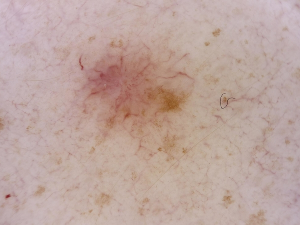

In [43]:
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

from tensorflow.keras.preprocessing import image

pointer = 2
label = train_labels[1]  # select

pil_image = image.load_img(test_path + '/' + label + '/'  + os.listdir(test_path+'/' + label)[pointer], target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
print(f'{label}')
pil_image

In [44]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 225, 300, 3)


In [45]:
# Preprocess the image
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255

# Predict probabilities
pred_logits = model.predict(my_image)[0]
pred_proba = softmax(pred_logits)

# Extract predicted class index
pred_class_index = np.argmax(pred_proba)
pred_proba_max = np.max(pred_proba)  # Maximum probability

# Create mapping dictionary
target_map = {v: k for v, k in enumerate(class_names)}

# Extract predicted class name
pred_class = target_map[pred_class_index]

# Display the result
print(f"Predicted Class: {pred_class}")
print(f"Probability: {pred_proba_max:.2f}")

# Display probability of each class
for i, prob in enumerate(pred_proba):
    print(f"Probability of {target_map[i]}: {prob:.2f}")

1/1 [==============================] - 0s 99ms/step
Predicted Class: bkl
Probability: 0.91
Probability of akiec: 0.00
Probability of bcc: 0.00
Probability of bkl: 0.91
Probability of df: 0.00
Probability of mel: 0.01
Probability of nv: 0.06
Probability of vasc: 0.00


## Classification report 

In [17]:
import numpy as np

all_features = []
all_labels = []

# Iterate through the dataset
for features, labels in df_test:
    # Convert tensors to numpy arrays and accumulate
    all_features.append(features.numpy())
    all_labels.append(labels.numpy())

# Optionally, concatenate the list of arrays into a single numpy array
all_features = np.concatenate(all_features, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

print("Features shape:", all_features.shape)
print("Labels shape:", all_labels.shape)

2023-06-19 19:02:13.845454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2010]
	 [[{{node Placeholder/_4}}]]
2023-06-19 19:02:13.845774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2010]
	 [[{{node Placeholder/_0}}]]


Features shape: (2010, 225, 300, 3)
Labels shape: (2010,)


63/63 [==============================] - 272s 4s/step


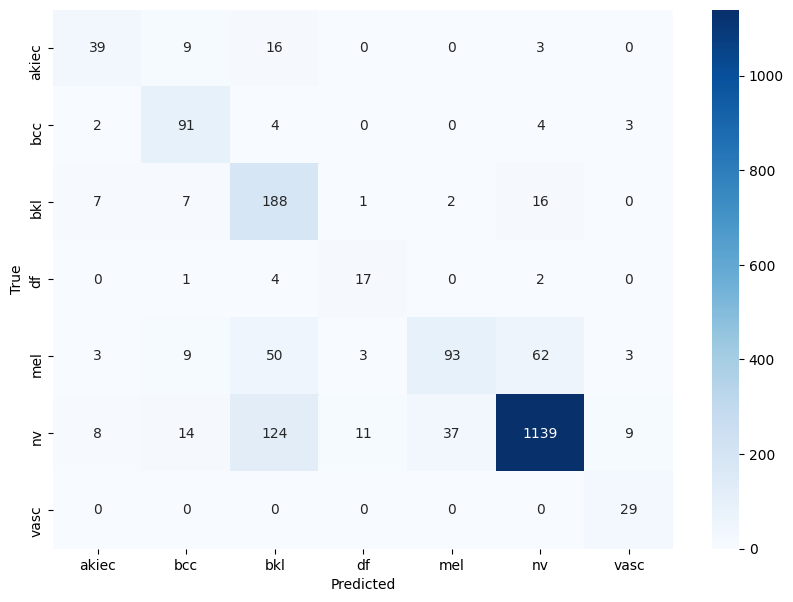

              precision    recall  f1-score   support

       akiec       0.66      0.58      0.62        67
         bcc       0.69      0.88      0.77       104
         bkl       0.49      0.85      0.62       221
          df       0.53      0.71      0.61        24
         mel       0.70      0.42      0.52       223
          nv       0.93      0.85      0.89      1342
        vasc       0.66      1.00      0.79        29

    accuracy                           0.79      2010
   macro avg       0.67      0.75      0.69      2010
weighted avg       0.83      0.79      0.80      2010



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

X_train = all_features
y_true = all_labels

y_pred = model.predict(X_train)

y_pred_labels = np.argmax(y_pred, axis=1)

unique_labels = np.unique(np.concatenate((y_true, y_pred_labels)))

unique_class_names = [class_names[label] for label in unique_labels]

cm = confusion_matrix(y_true, y_pred_labels, labels=unique_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_class_names, yticklabels=unique_class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Compute F1 score, Precision, and Recall
print(classification_report(y_true, y_pred_labels, target_names=unique_class_names))

---

---

NOTE

High Accuracy Classes: The model performed exceptionally well on classes 'bkl', 'vasc', 'nv', and 'bcc'. This indicates that the model is capable of identifying these classes accurately and has learned relevant features for these categories.

Moderate Accuracy Classes: The classes 'akiec' and 'df' exhibited a moderate accuracy. This suggests that there is some room for improvement in the model's ability to correctly classify these categories.

Low Accuracy Class: The model performed poorly in classifying the 'mel' class. This suggests that the model has difficulty distinguishing features unique to the 'mel' class.

Overall Performance: The overall accuracy indicates that the model is relatively accurate but can be improved, especially in the 'mel' class. The model doesnt furfill:

**Business Requirement 1**: The client aims to visually differentiate lesions. The model should be capable of reaching an accuracy of at least 70%.

**Business Requirement 3**: If a skin lesion is predicted as malignant with high confidence, the system should recommend immediate medical consultation.

Malignant lesions are the most dangerous and must have a high confidence and accuracy.

The report provides precision, recall, f1-score, and support for each class, as well as the overall accuracy, macro average, and weighted average across all classes. Here is a summary:

AKIEC: For the class 'akiec', the model achieves a precision of 0.66, which indicates that 66% of the instances that were predicted as 'akiec' were actually 'akiec'. The recall is 0.58, indicating that the model correctly identified 58% of all actual 'akiec' instances. The F1-score, which balances precision and recall, is 0.62.

BCC: The 'bcc' class has a higher precision of 0.69 and a higher recall of 0.88. This suggests that the model is quite good at identifying this class, with an F1-score of 0.77.

BKL: For the 'bkl' class, the model has a lower precision of 0.49, but a relatively high recall of 0.85. The F1-score is 0.62.

DF: The 'df' class has a precision of 0.53 and a recall of 0.71, with an F1-score of 0.61.

MEL: The 'mel' class has a precision of 0.70 but a lower recall of 0.42. The F1-score is 0.52, which indicates that there is a trade-off between precision and recall for this class.

NV: The 'nv' class, which has the highest number of samples (support=1342), has high precision and recall values of 0.93 and 0.85 respectively. This class has a high F1-score of 0.89, suggesting that the model is highly effective in classifying this class correctly.

VASC: The 'vasc' class, which has the lowest support (29 samples), has a precision of 0.66, but a recall of 1.00. This indicates that the model was able to capture all the 'vasc' instances but made some false positives as well. The F1-score is 0.79.

Overall Performance: The overall accuracy of the model on the test data is 0.79, which means it made the right prediction for 79% of the samples. The macro average F1-score is 0.69, which takes the unweighted mean of the F1-score of each class, indicating an average performance across different classes. The weighted average F1-score is 0.80, taking into account the support of each class.

In conclusion, the model performs relatively well, especially for classes with a higher number of samples like 'nv'. However, there is room for improvement, especially for classes like 'mel' where the recall is quite low. The results also show that the model is better at identifying certain classes over others. Fine-tuning the model, using more balanced data, or employing different model architectures might improve the performance for the underperforming classes.

---